In [1]:
import sys
print('python', sys.version)

import numpy as np
print('numpy', np.__version__)

import pandas as pd
print('pandas', pd.__version__)

import matplotlib as mpl
print('matplotlib', mpl.__version__)

import matplotlib.pyplot as plt

# # 결과 확인을 용이하게 하기 위한 코드
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

plt.rc("font", family="AppleGothic") # 한글표시 (window)
plt.rc("axes", unicode_minus=False) # x,y축 (-)부호 표시


python 3.10.13 (main, Mar 12 2024, 15:59:23) [Clang 15.0.0 (clang-1500.1.0.2.5)]
numpy 1.26.4
pandas 2.2.3
matplotlib 3.8.3


# 6w

## 실습1

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,class
0,20,23,89,35,63,50,53,71,16,8,0
1,16,89,86,97,49,93,61,6,43,77,1
2,35,58,20,3,93,48,6,61,75,33,0
3,62,35,39,64,67,36,89,4,42,64,1
4,69,68,31,50,72,51,95,51,43,41,1
...,...,...,...,...,...,...,...,...,...,...,...
195,96,32,16,16,78,7,19,95,13,85,0
196,2,78,84,97,3,47,10,16,37,35,1
197,45,7,99,85,83,72,38,20,25,77,1
198,45,28,91,69,80,70,1,38,50,52,1


class
1    120
0     80
Name: count, dtype: int64

f8    49.470833
f4    38.579167
dtype: float64
f10    1.683333
f6     2.895833
dtype: float64


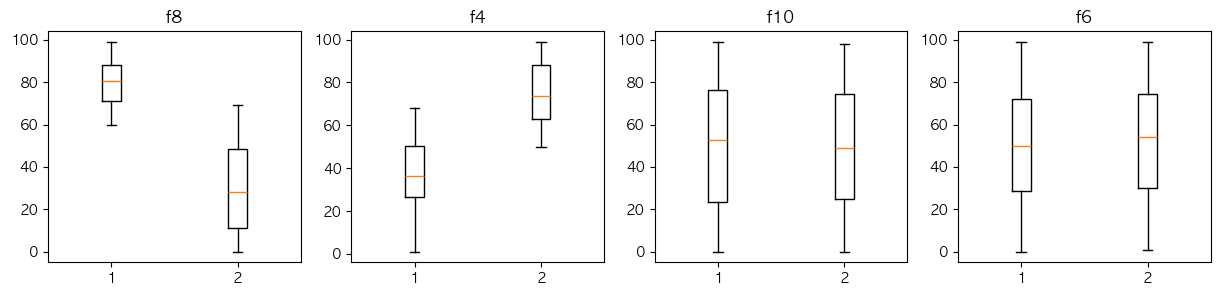

In [2]:
## data load
data = pd.read_table('data/dat_class.txt', sep='\t')
data
data['class'].value_counts()

## data seperation
class0 = data[data['class'] == 0]
mean0 = np.mean(class0, axis=0)
class1 = data[data['class'] == 1]
mean1 = np.mean(class1, axis=0)

## get significant features
# 구분 잘 되는 피처 8,4 / 구분 잘 안 되는 피처 10,6
significant_features = np.abs(mean0 - mean1)[:-1].sort_values(ascending=False)
print(significant_features[:2])
print(significant_features[-1:-3:-1])
significant_indicies = list(significant_features[:2].index) + list(significant_features[-1:-3:-1].index)

## draw boxplot
fig=plt.figure(figsize=(15,3), dpi=100)
axs=fig.subplots(1,4)
for i,col in enumerate(significant_indicies):
    _=axs[i].set_title(col)
    _=axs[i].boxplot([data.loc[data['class'] == cls,col] for cls in [0,1]])


## 컬러 지정 (하나의 값, scalar 형태)

### 컬러지정 예제1

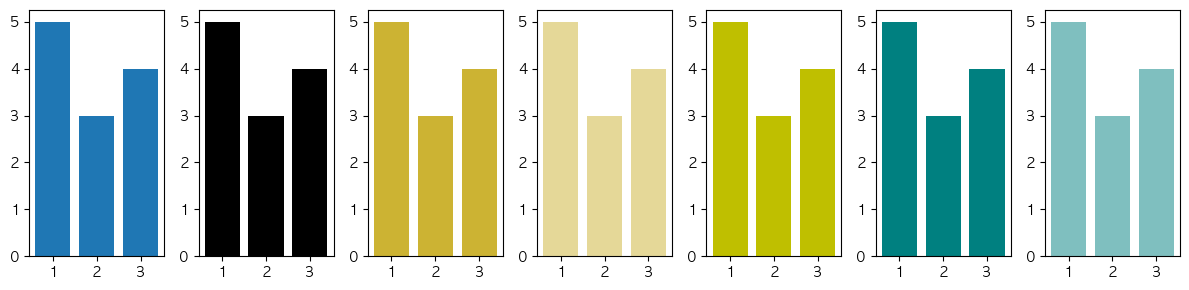

In [4]:
fig=plt.figure(figsize=(12,3), dpi=100)
axs=fig.subplots(1,7)

X=[1,2,3]
Y=[5,3,4]

_=axs[0].bar(X,Y)
_=axs[1].bar(X,Y,color=(0,0,0))
_=axs[2].bar(X,Y,color=(0.8,0.7,0.2))
_=axs[3].bar(X,Y,color=(0.8,0.7,0.2), alpha=0.5)
_=axs[4].bar(X,Y,color='y')
_=axs[5].bar(X,Y,color='teal')
_=axs[6].bar(X,Y,color='teal',alpha=0.5)
fig.tight_layout()

### 컬러지정 예제2

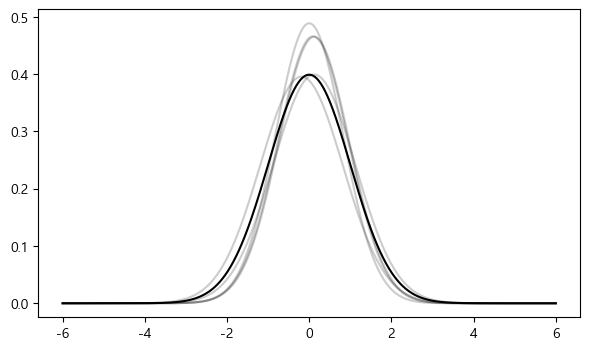

In [70]:
def pdf(X, mu, sigma):
    a = 1/(sigma * np.sqrt(2*np.pi))
    b = -1/(2*(sigma**2))
    return a * np.exp(b * ((X - mu)** 2))

fig=plt.figure(figsize=(7,4), dpi=100)
ax=fig.subplots()

X = np.linspace(-6, 6, 1000)

_=ax.plot(X, pdf(X, 0, 1), color = 'k')
#_=ax.hist(np.random.normal(size=100000), bins=50, edgecolor='k', density=True)

for i in range(5):
    samples = np.random.normal(size=50)
    m1, s1 = np.mean(samples), np.std(samples)
    _=ax.plot(X, pdf(X, m1, s1), color = 'k', alpha=0.2)



### 실습2

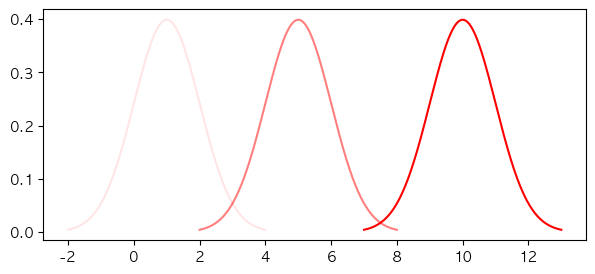

In [5]:
def pdf(X, mu, sigma):
    a = 1/(sigma * np.sqrt(2*np.pi))
    b = -1/(2*(sigma**2))
    return a * np.exp(b * ((X - mu)** 2))

def draw_pdf_with_k(ax, k):
    # X 범위 설정
    # axes plot 호출: plot 함수의 y는 pdf함수의 return
    X = np.linspace(k-3, k+3, 1000)
    ax.plot(X, pdf(X,k,1), color='r',alpha=k*0.1)

fig=plt.figure(figsize=(7,3), dpi=100)
ax=fig.subplots()

## 코드작성

draw_pdf_with_k(ax, 1)
draw_pdf_with_k(ax, 5)
draw_pdf_with_k(ax, 10)

### scatter 사용자 컬러 지정 예제

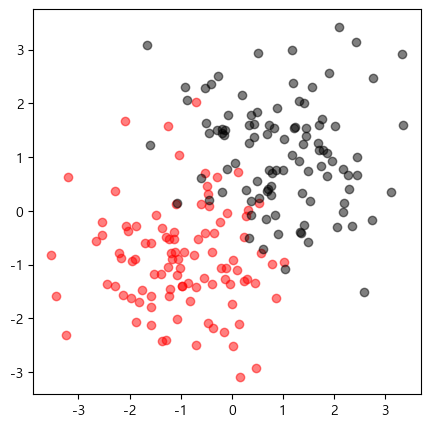

In [45]:
fig=plt.figure(figsize=(5,5), dpi=100)
ax=fig.subplots()

A = np.random.normal(size=(100, 2))
A += np.array([-1, -1])

B = np.random.normal(size=(100, 2))
B += np.array([1, 1])

ax.scatter(A[:,0], A[:,1], color = 'r', alpha=0.5)
ax.scatter(B[:,0], B[:,1], color = 'k', alpha=0.5)

## 시퀀스 형태의 color parameter

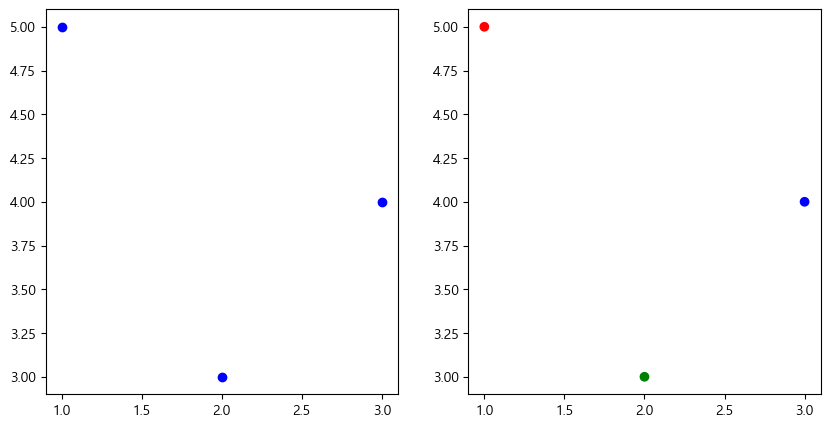

In [12]:
fig=plt.figure(figsize=(10,5), dpi=100)
ax1,ax2=fig.subplots(1,2)

_=ax1.scatter([1,2,3],[5,3,4], color='b')
_=ax2.scatter([1,2,3],[5,3,4], color=['r','g','b'])

### 실습3 (3w 실습 revisit)

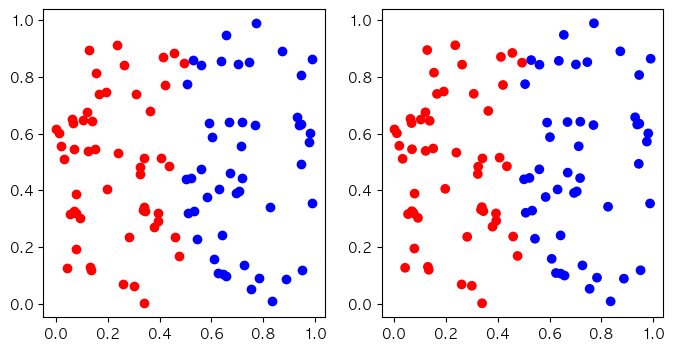

In [6]:
fig=plt.figure(figsize=(8,4), dpi=100)
ax1, ax2=fig.subplots(1,2)

data=np.random.uniform(0,1,size=(100,2))

X=data[:,0]
Y=data[:,1]

## ax1
data_red=data[X<0.5]
data_blu=data[X>0.5]

ax1.scatter(data_red[:,0], data_red[:,1], c='r')
ax1.scatter(data_blu[:,0], data_blu[:,1], c='b')

## ax2 <=== color parameter 사용
color_list = np.where(X<0.5,'r','b')
ax2.scatter(X,Y,color=color_list)

### iris scatter plot

,sep_len,sep_wid,pet_len,pet_wid,name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


name
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

0      r
1      r
2      r
3      r
4      r
      ..
145    b
146    b
147    b
148    b
149    b
Name: name, Length: 150, dtype: object

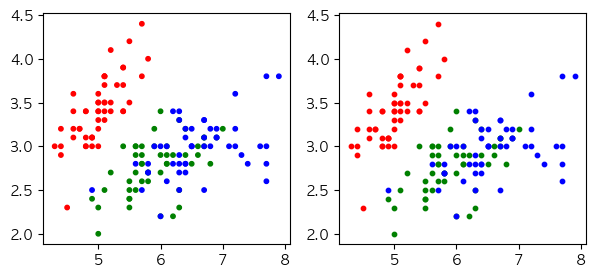

In [3]:
fig=plt.figure(figsize=(7,3), dpi=100)
ax1,ax2=fig.subplots(1,2)

## data load
data = pd.read_table('data/dat_iris.txt', sep=',')
data.head()
data["name"].value_counts()
color_dic={'Iris-setosa':'r','Iris-versicolor':'g','Iris-virginica':'b'}

## ax1
color=data['name'].replace(color_dic)
color
ax1.scatter(data['sep_len'], data['sep_wid'], c = color, s=10)

## ax2
for n1 in color_dic.keys():
    d1=data.loc[data['name']==n1]
    ax2.scatter(d1['sep_len'], d1['sep_wid'], c = color_dic[n1], s=10)

### 실습4

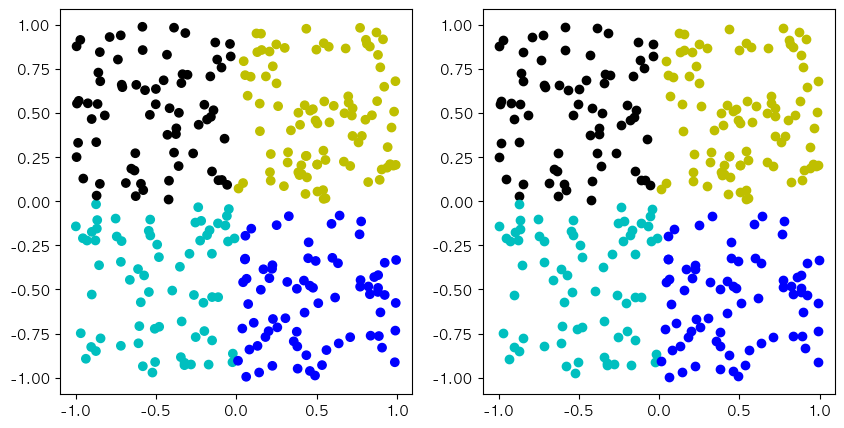

In [8]:
fig=plt.figure(figsize=(10,5), dpi=100)
ax1, ax2=fig.subplots(1,2)

data1=np.random.uniform(-1,1, size=(300,2))
df1=pd.DataFrame(data1, columns=['x','y'] )

X=df1['x']
Y=df1['y']

# ## ax1
# 코드작성
def replace_to_color(data):
    x,y = data
    if x > 0 and y > 0: return 'y'
    elif x <= 0 and y <= 0: return 'c'
    elif x <= 0 and y > 0: return 'k'
    elif x > 0 and y <= 0: return 'b'
color_list = list(map(replace_to_color,zip(df1['x'], df1['y'])))
_=ax1.scatter(X,Y,color=color_list)

# # ## ax2
X=df1['x']
Y=df1['y']

df_1a=df1.loc[(X> 0)&(Y> 0)]
df_2a=df1.loc[(X<=0)&(Y> 0)]
df_3a=df1.loc[(X<=0)&(Y<=0)]
df_4a=df1.loc[(X> 0)&(Y<=0)]

_=ax2.scatter(df_1a['x'], df_1a['y'], color='y')
_=ax2.scatter(df_2a['x'], df_2a['y'], color='k')
_=ax2.scatter(df_3a['x'], df_3a['y'], color='c')
_=ax2.scatter(df_4a['x'], df_4a['y'], color='b') # parameter: c or color 모두 사용 가능


### edgecolor

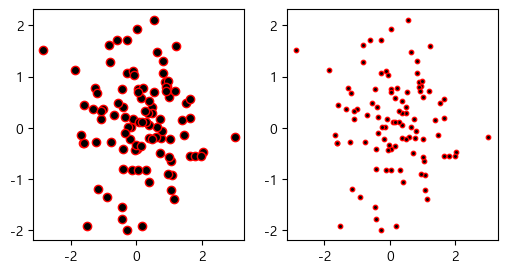

In [64]:
fig=plt.figure(figsize=(6,3), dpi=100)
ax1,ax2=fig.subplots(1,2)

data = np.random.normal(size=(100, 2))
ax1.scatter(data[:,0], data[:,1], color = 'k', edgecolor='r')
ax2.scatter(data[:,0], data[:,1], color = 'k', edgecolor='r', s=10)

## bar 사용자 컬러 지정

### bar 다양한 컬러 사용

<BarContainer object of 50 artists>

<BarContainer object of 50 artists>

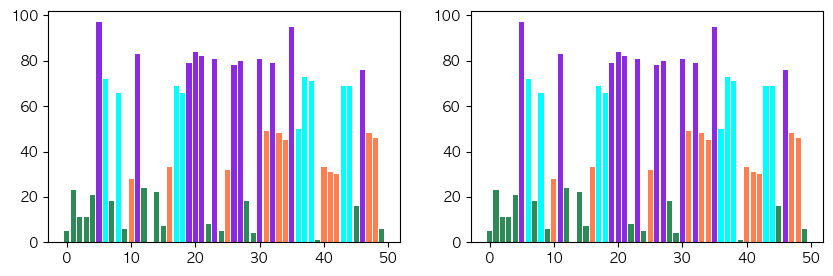

In [7]:
fig=plt.figure(figsize=(10,3), dpi=100)
ax1, ax2 =fig.subplots(1,2)

values=np.random.randint(100, size=50)
X=np.arange(len(values))
color_set = ['seagreen','coral','aqua','blueviolet']

## ax1
color_list=[]
for val in values:
    color_list.append(color_set[val//25])

ax1.bar(X, values, color = color_list)

## ax2
color_list = [color_set[val//25] for val in values]
ax2.bar(X, values, color = color_list) # bar 함수는 color 지정 시, c parameter 사용불가


### 실습5

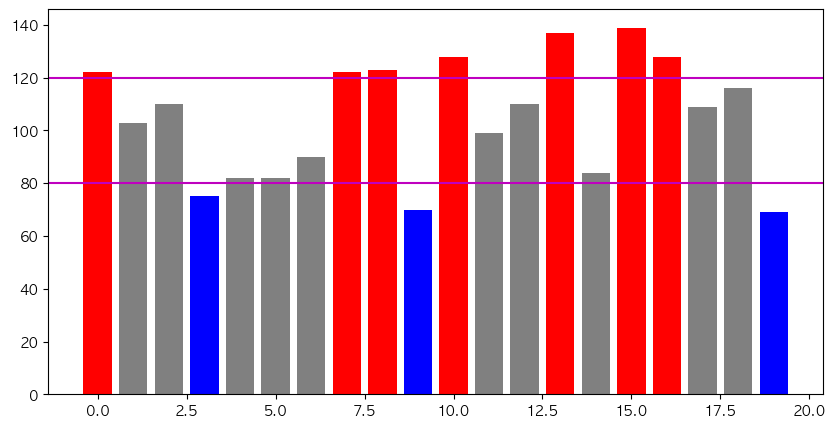

In [14]:
fig=plt.figure(figsize=(10,5), dpi=100)
ax=fig.subplots()

bp=np.random.randint(60,140, size=20)

## 코드작성
color_dic = {0:'b',1:'grey',2:'r'}
def convert_bp_to_color_code(bp):
    if bp < 80: return 0
    elif bp <= 120: return 1
    else: return 2
color_list = [color_dic[convert_bp_to_color_code(num)] for num in bp]
_=ax.bar(range(len(bp)),bp,color=color_list)

_=ax.axhline(y=80, color='m')
_=ax.axhline(y=120, color='m')

# === 실습풀이 ===

## 실습1

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,class
0,20,23,89,35,63,50,53,71,16,8,0
1,16,89,86,97,49,93,61,6,43,77,1
2,35,58,20,3,93,48,6,61,75,33,0
3,62,35,39,64,67,36,89,4,42,64,1
4,69,68,31,50,72,51,95,51,43,41,1
...,...,...,...,...,...,...,...,...,...,...,...
195,96,32,16,16,78,7,19,95,13,85,0
196,2,78,84,97,3,47,10,16,37,35,1
197,45,7,99,85,83,72,38,20,25,77,1
198,45,28,91,69,80,70,1,38,50,52,1


class
1    120
0     80
Name: count, dtype: int64

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10
0,20,23,89,35,63,50,53,71,16,8
2,35,58,20,3,93,48,6,61,75,33
6,83,24,45,32,92,15,80,97,30,89
8,42,50,84,56,97,23,50,62,22,63
10,16,29,12,34,35,99,67,75,2,71
...,...,...,...,...,...,...,...,...,...,...
181,2,0,9,36,10,87,50,97,34,29
182,55,36,11,1,2,96,75,63,28,37
183,74,19,46,62,53,99,72,62,32,86
184,46,46,49,45,95,88,97,89,70,51


,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10
1,16,89,86,97,49,93,61,6,43,77
3,62,35,39,64,67,36,89,4,42,64
4,69,68,31,50,72,51,95,51,43,41
5,77,42,65,72,68,60,34,1,89,46
7,3,81,83,57,96,10,20,6,58,29
...,...,...,...,...,...,...,...,...,...,...
194,27,85,77,79,15,22,62,29,61,65
196,2,78,84,97,3,47,10,16,37,35
197,45,7,99,85,83,72,38,20,25,77
198,45,28,91,69,80,70,1,38,50,52


('f4', 'f8')

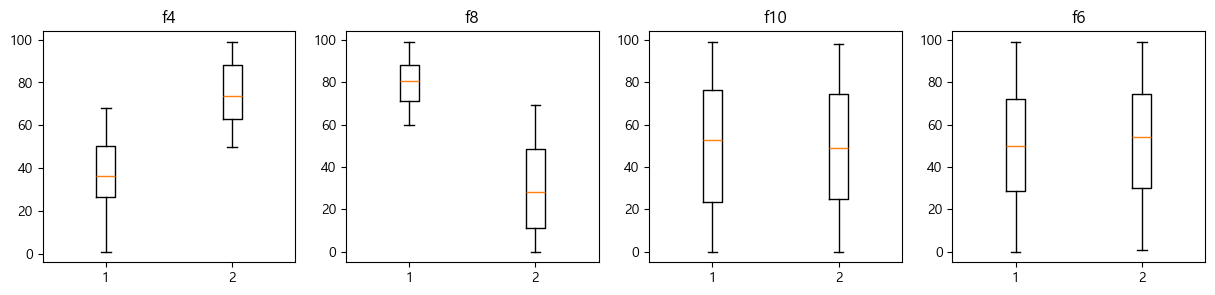

In [3]:
## data load
data = pd.read_table('data/dat_class.txt', sep='\t')
data
data['class'].value_counts()

## data seperation
data0=data.loc[data['class']==0]
data0=data0.drop(columns=['class'])
data0
data1=data.loc[data['class']==1]
data1=data1.drop(columns=['class'])
data1

## get significant features
mean_diff=abs(data0.mean(axis=0)-data1.mean(axis=0))
mean_diff_sorted=mean_diff.sort_values()
g1,g2=mean_diff_sorted.index[-2:]
b1,b2=mean_diff_sorted.index[:2]
g1,g2

## draw boxplot
fig=plt.figure(figsize=(15,3), dpi=100)
axs=fig.subplots(1,4)

for ii,f in enumerate([g1,g2,b1,b2]):
    _=axs[ii].boxplot([data0[f], data1[f]])
    _=axs[ii].set_title(f)

## 실습2

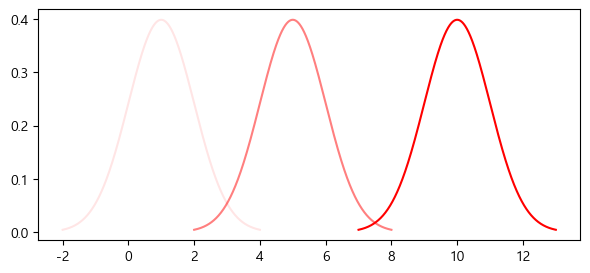

In [10]:
def pdf(X, mu, sigma):
    a = 1/(sigma * np.sqrt(2*np.pi))
    b = -1/(2*(sigma**2))
    return a * np.exp(b * ((X - mu)** 2))

def draw_pdf_with_k(ax, k):
    X = np.linspace(k-3, k+3, 1000)
    _=ax.plot(X, pdf(X, k, 1), color = 'r', alpha=k*0.1)

fig=plt.figure(figsize=(7,3), dpi=100)
ax=fig.subplots()

## 코드작성

draw_pdf_with_k(ax, 1)
draw_pdf_with_k(ax, 5)
draw_pdf_with_k(ax, 10)

## 실습3 (3w 실습 revisit)

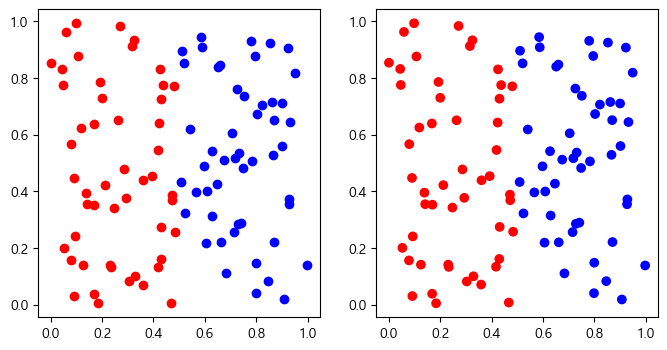

In [54]:
fig=plt.figure(figsize=(8,4), dpi=100)
ax1, ax2=fig.subplots(1,2)

data=np.random.uniform(0,1,size=(100,2))

X=data[:,0]
Y=data[:,1]

## ax1
data_red=data[X<0.5]
data_blu=data[X>0.5]

ax1.scatter(data_red[:,0], data_red[:,1], c='r')
ax1.scatter(data_blu[:,0], data_blu[:,1], c='b')

## ax2 <=== color parameter 사용
color=np.where(X<0.5,'r','b')
ax2.scatter(X, Y, c=color)

## 실습4

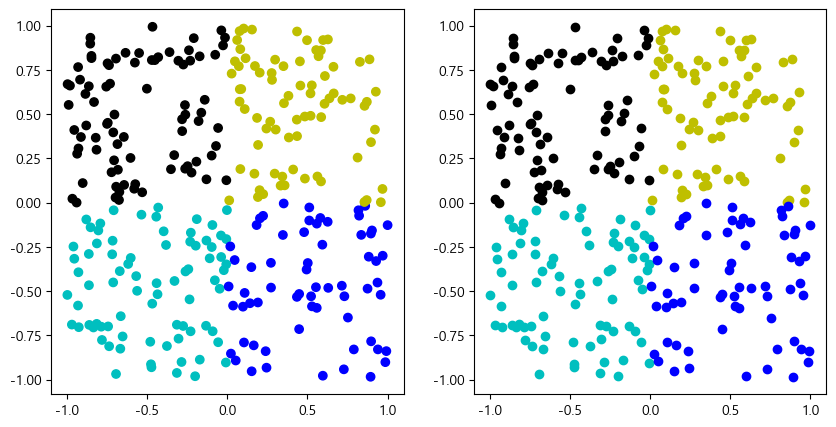

In [21]:
fig=plt.figure(figsize=(10,5), dpi=100)
ax1, ax2=fig.subplots(1,2)

data1=np.random.uniform(-1,1, size=(300,2))
df1=pd.DataFrame(data1, columns=['x','y'] )

# ## ax1
col_list=[]
for ii in range(len(df1)):
    row=df1.iloc[ii]
    x=row['x']
    y=row['y']

    if (x>0) and (y>0):
        col_list.append('y')
    elif (x<=0) and (y>0):
        col_list.append('k')
    elif (x<=0) and (y<=0):
        col_list.append('c')
    else:
        col_list.append('b')
        
_=ax1.scatter(df1['x'], df1['y'], color=col_list)

# # ## ax2
X=df1['x']
Y=df1['y']

df_1a=df1.loc[(X> 0)&(Y> 0)]
df_2a=df1.loc[(X<=0)&(Y> 0)]
df_3a=df1.loc[(X<=0)&(Y<=0)]
df_4a=df1.loc[(X> 0)&(Y<=0)]

_=ax2.scatter(df_1a['x'], df_1a['y'], color='y')
_=ax2.scatter(df_2a['x'], df_2a['y'], color='k')
_=ax2.scatter(df_3a['x'], df_3a['y'], color='c')
_=ax2.scatter(df_4a['x'], df_4a['y'], color='b') # parameter: c or color 모두 사용 가능


## 실습5

<BarContainer object of 20 artists>

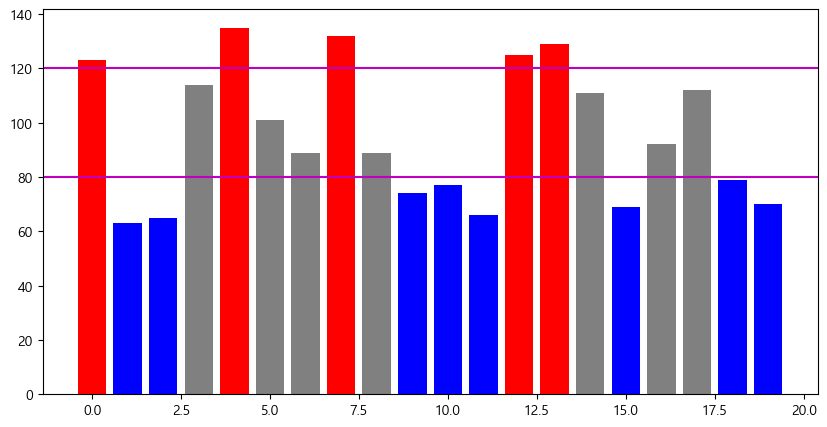

In [22]:
fig=plt.figure(figsize=(10,5), dpi=100)
ax=fig.subplots()

bp=np.random.randint(60,140, size=20)
color_list=[]
for val in bp:
    if val<80:
        color_list.append('b')
    elif val<=120:
        color_list.append('gray')
    else:
        color_list.append('r')

X=np.arange(len(bp))
ax.bar(X, bp, color=color_list)

_=ax.axhline(y=80, color='m')
_=ax.axhline(y=120, color='m')